In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('../data/stock_series_train.csv')
df['Date'] = pd.to_datetime(df['Date'])
dftop7 = df.groupby('stock_id', as_index=False)['Close'].\
    mean().dropna().sort_values('Close', ascending=False)
topstocks = dftop7.head(7)['stock_id']
dftop7.head(7)

dftop7 = df.groupby('stock_id', as_index=False)['Close'].\
    mean().dropna().sort_values('Close', ascending=False)
topstocks = dftop7.head(7)['stock_id']



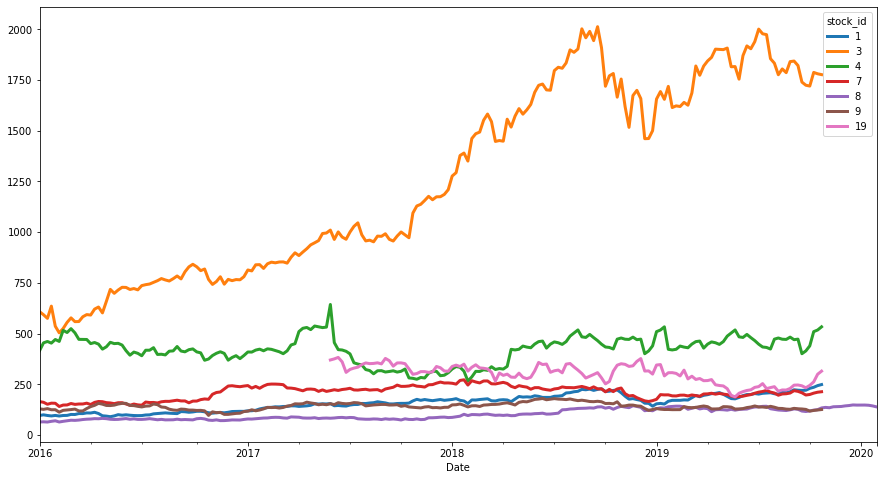

In [4]:
stocklist = [1,2,3]
stockseries = pd.DataFrame(df[(df['stock_id'].\
    isin(topstocks))][['Date','stock_id','Close']].\
    dropna().\
    groupby(['Date', 'stock_id'])['Close'].mean().unstack())
stockseries.plot(figsize=(15,8), linewidth=3)
plt.show()

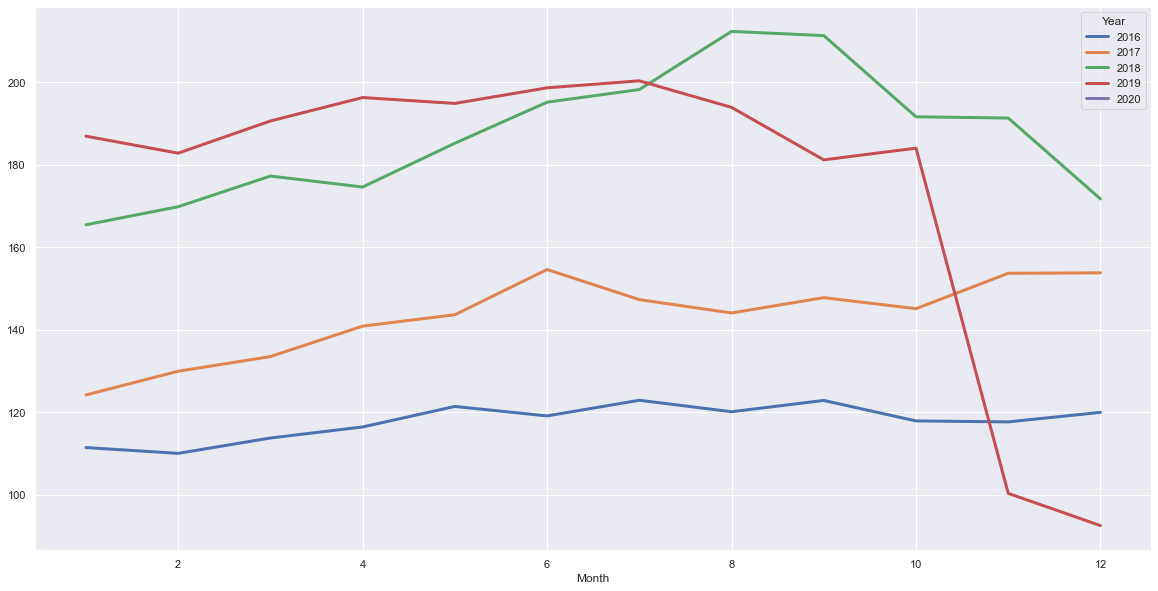

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
season = df
season['Date'] = df.Date
season['Year'] = df['Date'].dt.year
season['Month'] = df['Date'].dt.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'Close', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,Close,Volume
Close,1.000000,0.727954
Volume,0.727954,1.000000


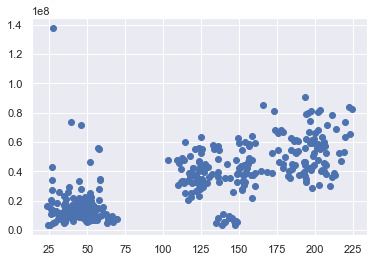

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

close_vol = df.groupby('Date')['Date','Close', 'Volume'].\
    mean().dropna()
# pd.plotting.autocorrelation_plot(brtypes);
# plt.show()
plt.scatter(close_vol['Close'], close_vol['Volume'])
close_vol.corr()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


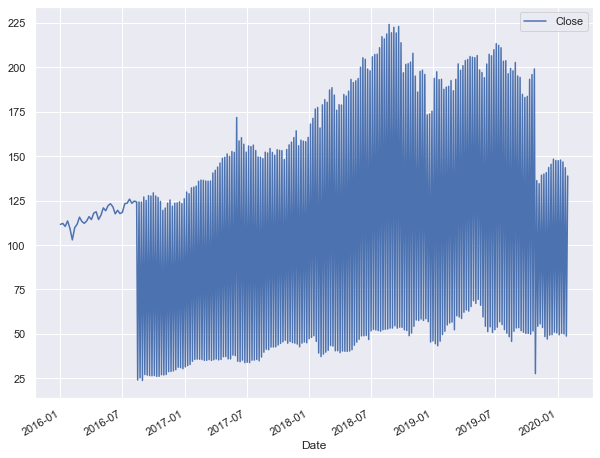

In [7]:
allstocks = df.groupby('Date')['Date','Close'].mean().dropna()
allstocks.plot(figsize=(10,8))
plt.show()

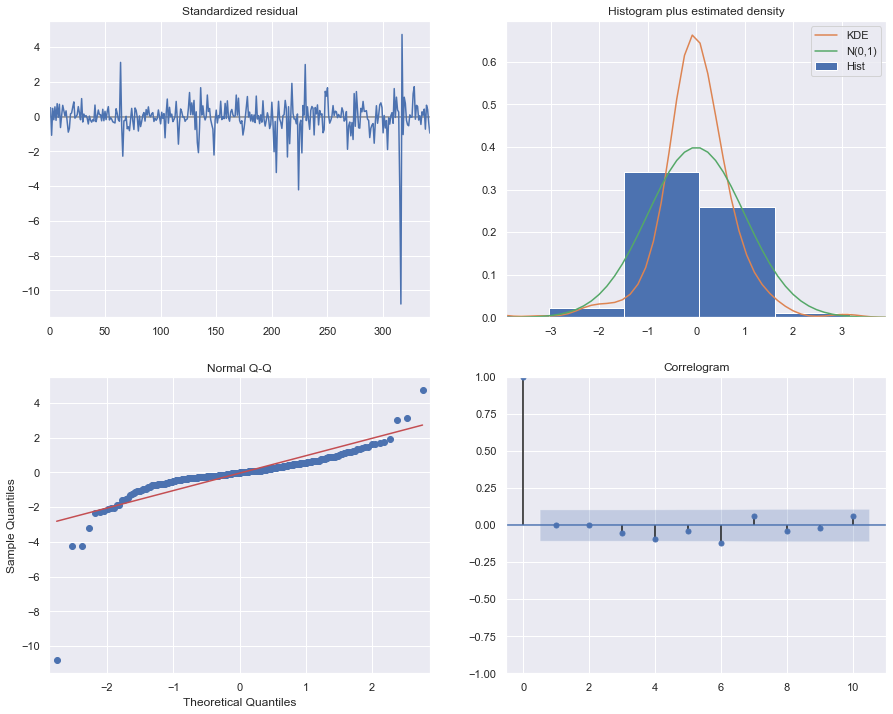

In [15]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
mod = sm.tsa.statespace.SARIMAX(allstocks,
                                    order = (2, 2, 4),
                                    seasonal_order = (3, 1, 2, 12),
                                    enforce_stationarity = False,
                                    enforce_invertibility = False)
results = mod.fit()
results.plot_diagnostics(figsize=(15,12))
plt.show()